In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv("E:/Assignments/ASsignment week 12/Desicion trees/Assignment/Diabetes.csv")
lb = LabelEncoder()


In [2]:
data.isnull().sum()
data.dropna()
data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', 'Class_variable'],
      dtype='object')

In [3]:
data['Class_variable'].unique()

array(['YES', 'NO'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Class_variable                 768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
colnames = list(data.columns)

In [6]:
predictors = colnames[:8]
target = colnames[8]

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

In [14]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree

In [27]:
model = DT(criterion ='gini',max_depth=3)
model.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,NO,YES
Actual,,
NO,111,32
YES,28,60


In [29]:
np.mean(preds == test[target]) 

0.7402597402597403

In [30]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])
np.mean(preds == train[target])

0.7690875232774674

Clearly we can see that our odel is overfitting . So let us apply some regularization techniques.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

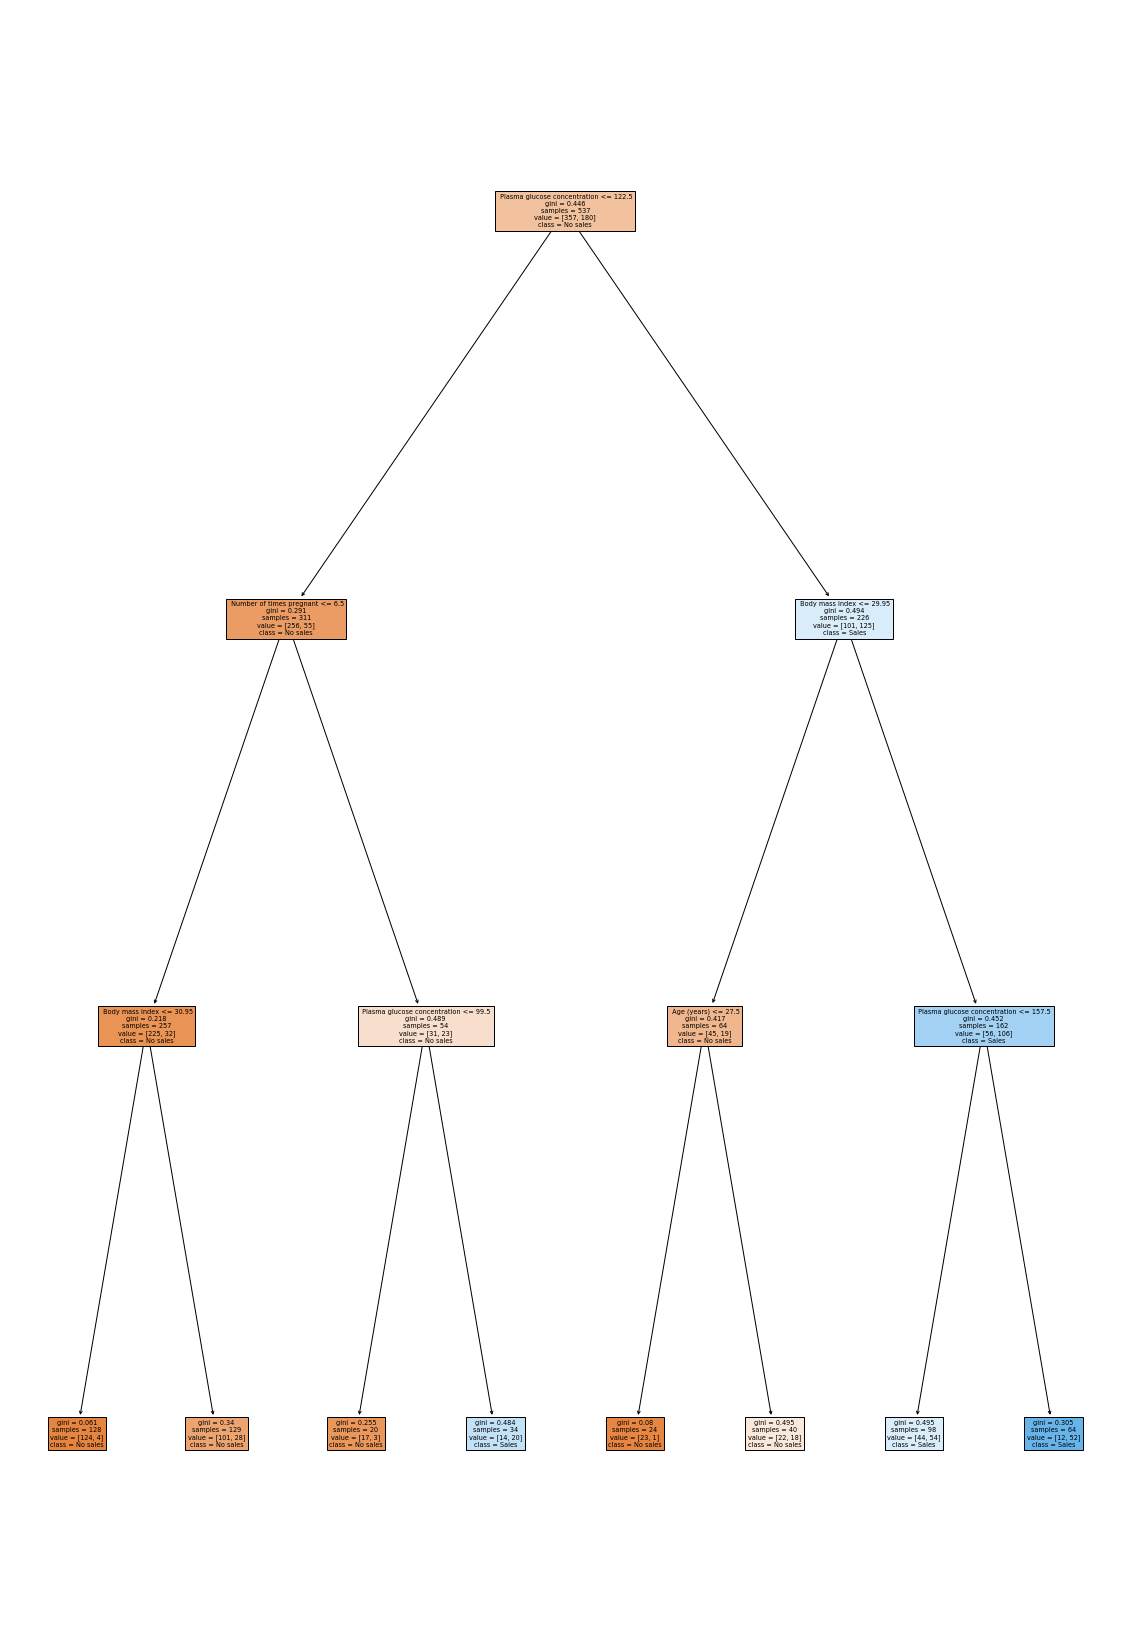

In [37]:
plt.figure(figsize=(20,30))
features = data.columns
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()